In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [35]:
import pandas as pd
import numpy as np
from src.model import *

In [9]:
df = pd.read_csv('data/partd_heme-onc_16.txt', delimiter='\t')
cols = pd.read_csv('data/CMS_PartD_Prescriber_NPI_Drug_CY2016_100.txt', delimiter='\t').columns
df.columns = cols

df.groupby('drug_name').total_drug_cost.sum().sort_values(ascending=False)[:20]

drug_name
REVLIMID             1.541023e+09
IBRANCE              4.959937e+08
IMBRUVICA            4.944358e+08
ZYTIGA               3.478517e+08
GLEEVEC              3.356121e+08
XTANDI               3.351198e+08
JAKAFI               2.582428e+08
POMALYST             1.928705e+08
TARCEVA              1.601495e+08
IMATINIB MESYLATE    1.496428e+08
TASIGNA              1.453043e+08
SPRYCEL              1.365173e+08
AFINITOR             1.054010e+08
NEXAVAR              5.326098e+07
PROMACTA             4.744511e+07
SUTENT               4.663820e+07
PROCRIT              4.493428e+07
VOTRIENT             4.472293e+07
XARELTO              3.866848e+07
NINLARO              3.704270e+07
Name: total_drug_cost, dtype: float64

In [5]:
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,ANASTROZOLE,ANASTROZOLE,17.0,...,98.0,2940,563.03,NaN,#,38.0,NaN,70.0,2100.0,410.78
1,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,BICALUTAMIDE,BICALUTAMIDE,NaN,...,12.0,358,148.55,NaN,*,12.0,NaN,12.0,358.0,148.55
2,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,OXYCODONE HCL,OXYCODONE HCL,NaN,...,32.0,664,688.17,NaN,*,19.0,NaN,19.0,400.0,283.81
3,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,PREDNISONE,PREDNISONE,NaN,...,11.0,290,85.63,NaN,*,NaN,*,NaN,NaN,NaN
4,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,PROCHLORPERAZINE MALEATE,PROCHLORPERAZINE MALEATE,12.0,...,12.0,93,63.67,NaN,*,NaN,*,NaN,NaN,NaN


In [33]:
#top 20 partd drugs by spend
partd_drugs = ['REVLIMID', 'IBRANCE', 'IMBRUVICA', 'ZYTIGA', 'GLEEVEC', 'XTANDI',
       'JAKAFI', 'POMALYST', 'TARCEVA', 'IMATINIB MESYLATE', 'TASIGNA',
       'SPRYCEL', 'AFINITOR', 'NEXAVAR', 'PROMACTA', 'SUTENT', 'PROCRIT',
       'VOTRIENT', 'XARELTO', 'NINLARO']

In [15]:
hcpcs_codes = pd.read_csv('data/ctcodes-procedures.csv', encoding='latin1')[['PX2', 'CHEMOCAT']]
hcpcs_codes.columns=['HCPCS_CODE', 'DRUG']
hcpcs_codes.head()

,HCPCS_CODE,DRUG
0,C9216,ABARELIX
1,J9216,ABARELIX
2,J0128,ABARELIX
3,S0165,ABARELIX
4,J3490,ABATACEPT


In [28]:
df2 = pd.read_csv('data/partb_heme-onc_16.txt', delimiter='\t')
cols2 = pd.read_csv('data/CMS_PartB_Provider_Util_Payment_CY2016_100.txt', delimiter='\t').columns
df2.columns = cols2
df2['total_drug_cost'] = df2['LINE_SRVC_CNT'] * df2['AVERAGE_SUBMITTED_CHRG_AMT']

LSC = pd.DataFrame(df2.groupby('HCPCS_CODE')['total_drug_cost'].sum().sort_values(ascending=False))
LSC.reset_index(inplace=True)
df3 = pd.merge(LSC, df2[['HCPCS_CODE', 'HCPCS_DESCRIPTION']], on='HCPCS_CODE', how='left')
df3 = df3.drop_duplicates().reset_index().drop('index', axis=1)
df3.head()

,HCPCS_CODE,total_drug_cost,HCPCS_DESCRIPTION
0,J2505,8.490974e+08,"Injection, pegfilgrastim, 6 mg"
1,99214,7.653537e+08,Established patient office or other outpatient...
2,J9310,5.320349e+08,"Injection, rituximab, 100 mg"
3,J0897,4.390341e+08,"Injection, denosumab, 1 mg"
4,96413,4.254195e+08,Infusion of chemotherapy into a vein up to 1 hour


In [30]:
#top 20 partb procedures/HCPCS codes by spend
partb_drugs = ['J2505', '99214', 'J9310', 'J0897', '96413', 'J9299', 'J0881',
       '99213', 'J9035', 'J0885', '99215', 'J2469', '78815', 'J1568',
       '99233', '99232', 'J1439', '96367', '85025', 'J9355']

In [34]:
partd_df = pd.DataFrame(columns=['npi'])
for drug in partd_drugs:
    drug_df = df.loc[df['drug_name'] == drug, ['npi', 'total_claim_count']]
    drug_df.columns = ['npi', drug]
    partd_df = pd.merge(partd_df, drug_df, on='npi', how='outer')
    
partd_df.fillna(0, inplace=True)
partd_df.set_index('npi', inplace=True)
partd_df.head()

,REVLIMID,IBRANCE,IMBRUVICA,ZYTIGA,GLEEVEC,XTANDI,JAKAFI,POMALYST,TARCEVA,IMATINIB MESYLATE,TASIGNA,SPRYCEL,AFINITOR,NEXAVAR,PROMACTA,SUTENT,PROCRIT,VOTRIENT,XARELTO,NINLARO
npi,,,,,,,,,,,,,,,,,,,,
1003027764,53.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0
1003031212,41.0,12.0,0.0,13.0,0.0,23.0,0.0,14.0,11.0,19.0,18.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0
1003043704,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003051871,27.0,50.0,15.0,11.0,0.0,68.0,0.0,0.0,0.0,27.0,11.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,31.0,0.0
1003067455,60.0,29.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0


In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [78]:
km = KMeans(n_clusters=3)
km.fit(partd_df)
km_labels = km.predict(partd_df)

In [83]:
km.n_clusters

3

In [79]:
# scale data
partd_df_scaled = (partd_df - partd_df.mean()) / partd_df.std()

In [80]:
pca = PCA(n_components=2)
pca_partd_df_scaled_trans = pca.fit_transform(partd_df_scaled, km_labels)

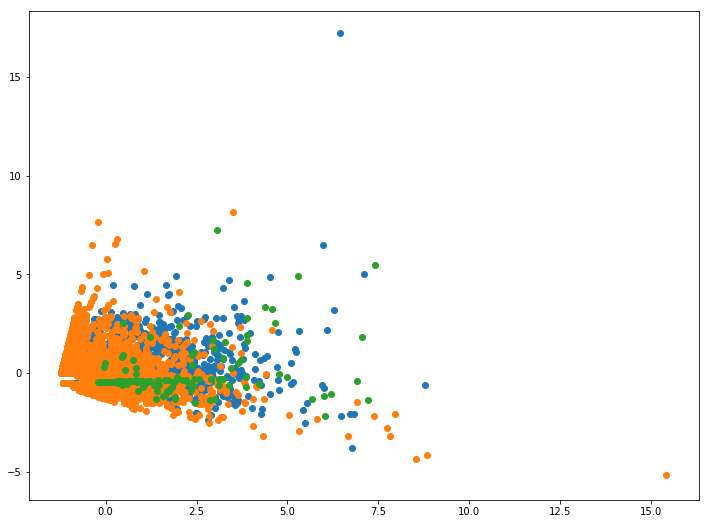

In [85]:
fig = plt.figure(figsize=(12,9))
for i in range(km.n_clusters):
    plt.scatter(pca_partd_df_scaled_trans[km_labels == i][:, 0], pca_partd_df_scaled_trans[km_labels == i][:, 1])

In [ ]:
# Create PCA plot of clusters

## Find most popular drugs that high prescribers of Imbruvica prescribe

In [41]:
imbruvica = clean_data('data/imbruvica_prescrib_npi_summary.csv')
X, y = get_Xy(imbruvica, 'high_prescrib')

npi_high_prescribers = X[y == 1].index.values

In [58]:
# partd
partd_drugs_imbruvica_HP = df[df['npi'].isin(npi_high_prescribers)].groupby('drug_name').sum()['total_drug_cost'].sort_values(ascending=False)[:20].index.values
partd_drugs_imbruvica_HP

array(['REVLIMID', 'IMBRUVICA', 'IBRANCE', 'JAKAFI', 'XTANDI', 'GLEEVEC',
       'ZYTIGA', 'POMALYST', 'TASIGNA', 'SPRYCEL', 'IMATINIB MESYLATE',
       'TARCEVA', 'AFINITOR', 'PROMACTA', 'PROCRIT', 'JADENU', 'NEXAVAR',
       'NINLARO', 'SUTENT', 'XARELTO'], dtype=object)

 - 19/20 of these drugs are also in the same list for highest spend drugs for entire dataset

In [60]:
# partb
partb_drugs_imbruvica_HP = df2[df2['NPI'].isin(npi_high_prescribers)].groupby('HCPCS_CODE').sum()['total_drug_cost'].sort_values(ascending=False)[:20].index.values
partb_drugs_imbruvica_HP

array(['J2505', 'J9310', '99214', 'J9299', 'J0897', '96413', 'J9035',
       'J0881', '99213', 'J0885', 'J2469', 'J1568', '78815', 'J9041',
       '99215', 'J9263', 'J9999', 'J1439', '85025', '96367'], dtype=object)

 - 17/20 of these drugs are also in the same list for highest spend drugs for entire dataset

## Identify high prescribers for these drugs

In [91]:
total_drug_cost_b = pd.read_csv('data/drugs/partb_totals.txt', delimiter='\t').iloc[:, 1:]
total_drug_cost_d = pd.read_csv('data/drugs/partd_totals.txt', delimiter='\t').iloc[:, 1:]
total_drug_cost_b.head()

,npi,78815_16.,96413_16.,J0885_16.,J0897_16.,99214_16.,J1568_16.,J1439_16.,J9310_16.,J2469_16.,...,J0881_16.,J9035_16.,96367_16.,J9299_16.,J9041_16.,J9999_16.,85025_16.,99215_16.,J2505_16.,99213_16.
0,1003013848,704375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003014473,14000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003018276,247408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003019654,45158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003021783,40482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
total_drug_costs = pd.merge(total_drug_cost_b, total_drug_cost_d, on='npi')
total_drug_costs = total_drug_costs.groupby('npi').sum()
#total_drug_costs.fillna(0, inplace=True)
total_drug_costs.reset_index(inplace=True)
total_drug_costs.head()

,npi,78815_16.,96413_16.,J0885_16.,J0897_16.,99214_16.,J1568_16.,J1439_16.,J9310_16.,J2469_16.,...,xarelto_16.,tasigna_16.,sutent_16.,ninlaro_16.,gleevec_16.,revlimid_16.,jakafi_16.,pomalyst_16.,jadenu_16.,zytiga_16.
0,1003000530,NaN,NaN,NaN,NaN,100450.00,NaN,NaN,NaN,NaN,...,5959.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003000936,NaN,NaN,NaN,NaN,70470.00,NaN,NaN,NaN,NaN,...,11950.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003002817,NaN,NaN,NaN,NaN,81410.00,NaN,NaN,NaN,NaN,...,10542.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003002890,NaN,NaN,NaN,NaN,7441.36,NaN,NaN,NaN,NaN,...,3723.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003005836,NaN,NaN,NaN,NaN,11472.28,NaN,NaN,NaN,NaN,...,8290.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
# quantiles
HP1 = pd.DataFrame(columns=total_drug_costs.columns.values[1:], index=total_drug_costs.npi)

for col in total_drug_costs.iloc[:, 1:]:
    HP1.loc[:, col] = 0
    quant = total_drug_costs.loc[:, col].quantile(0.75)
    npi_hp1 = total_drug_costs.loc[total_drug_costs.loc[:, col] > quant, 'npi'].values
    HP1.loc[npi_hp1] = 1

In [310]:
# any prescription at all
HP2 = pd.DataFrame(columns=total_drug_costs.columns.values[1:], index=total_drug_costs.npi)

for col in total_drug_costs.iloc[:, 1:]:
    HP2.loc[:, col] = 0
    npi_hp2 = total_drug_costs.loc[total_drug_costs.loc[:, col] > 0, 'npi'].values
    HP2.loc[npi_hp2] = 1

In [ ]:
# drug costs and sum of drug costs

In [311]:
#Merge dataframes
cols1 = [col[:-1] + '_1' for col in HP1.columns.values]
cols2 = [col[:-1] + '_2' for col in HP2.columns.values]
HP1.columns = cols1
HP2.columns = cols2

HP = HP1.join(HP2)
HP.reset_index(inplace=True)

In [312]:
HP.head()

,npi,78815_16_1,96413_16_1,J0885_16_1,J0897_16_1,99214_16_1,J1568_16_1,J1439_16_1,J9310_16_1,J2469_16_1,...,xarelto_16_2,tasigna_16_2,sutent_16_2,ninlaro_16_2,gleevec_16_2,revlimid_16_2,jakafi_16_2,pomalyst_16_2,jadenu_16_2,zytiga_16_2
0,1003000530,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1003000936,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1003002817,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1003002890,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1003005836,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Get total for partb and partd drugs per prescriber

In [415]:
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,ANASTROZOLE,ANASTROZOLE,17.0,...,98.0,2940,563.03,NaN,#,38.0,NaN,70.0,2100.0,410.78
1,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,BICALUTAMIDE,BICALUTAMIDE,NaN,...,12.0,358,148.55,NaN,*,12.0,NaN,12.0,358.0,148.55
2,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,OXYCODONE HCL,OXYCODONE HCL,NaN,...,32.0,664,688.17,NaN,*,19.0,NaN,19.0,400.0,283.81
3,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,PREDNISONE,PREDNISONE,NaN,...,11.0,290,85.63,NaN,*,NaN,*,NaN,NaN,NaN
4,1003015207,SWANEY,ROBERT,WHEAT RIDGE,CO,Hematology-Oncology,S,PROCHLORPERAZINE MALEATE,PROCHLORPERAZINE MALEATE,12.0,...,12.0,93,63.67,NaN,*,NaN,*,NaN,NaN,NaN


In [437]:

total_onc_drug_costs = pd.DataFrame(df.groupby('npi').sum()['total_drug_cost']).rename(columns={'total_drug_cost': 'total_costs_partd'})
total_onc_drug_costs = total_onc_drug_costs.join(df2.groupby('NPI').sum()['total_drug_cost']).rename(columns={'total_drug_cost': 'total_costs_partb'})
total_onc_drug_costs.fillna(0, inplace=True)
total_onc_drug_costs.reset_index(inplace=True)
total_onc_drug_costs.head()


,npi,total_costs_partd,total_costs_partb
0,1003015207,113189.02,4.310362e+04
1,1003027764,1244704.06,2.206680e+05
2,1003031212,1785843.63,7.381934e+06
3,1003043704,209640.45,5.725000e+04
4,1003051871,2305099.50,2.537050e+05


## Run model

In [245]:
from src.model import *
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [377]:
HP1.reset_index(inplace=True)

HP_test = HP1[['npi', 'tarceva_16.', 'procrit_16.', 'sprycel_16.', 'J2505_16.']]

In [385]:
EA_HP = pd.read_csv('data/imbruvica_EA_HP.txt', delimiter='\t')
EA_HP = EA_HP[['npi','xalkori_EA', 'gilotrif_EA',
       'mekinist_EA', 'zykadia_EA', 'imbruivca_EA', 'nivo_EA', 'xalkori_HP',
       'gilotrif_HP', 'mekinist_HP', 'zykadia_HP', 'nivo_HP', 'xalkori_HP2',
       'gilotrif_HP2']]

In [401]:
# total_drug_costs.fillna(0, inplace=True)
#total_drug_costs.drop('imbruvica_16.', axis=1, inplace=True)
total_drug_costs['total'] = total_drug_costs.sum(axis=1)

In [438]:
imbruvica = clean_data('data/imbruvica_prescrib_npi_summary.csv')
imbruvica_HP = pd.merge(imbruvica, HP_test, on='npi', how='left')
imbruvica_HP = pd.merge(imbruvica_HP, EA_HP[['npi', 'nivo_EA', 'nivo_HP']], on='npi', how='left')
imbruvica_HP = pd.merge(imbruvica_HP, total_drug_costs[['total', 'npi']], on='npi', how='left')
imbruvica_HP = pd.merge(imbruvica_HP, total_onc_drug_costs, on='npi', how='left')
imbruvica_HP.fillna(0, inplace=True)
imbruvica_HP.head()

,npi,generic_drug_cost,mapd_drug_cost,pdp_drug_cost,lis_drug_cost,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,er_opioid_drug_cost,er_opioid_prescriber_rate,...,high_prescrib,tarceva_16.,procrit_16.,sprycel_16.,J2505_16.,nivo_EA,nivo_HP,total,total_costs_partd,total_costs_partb
0,1114922432,43286.13,727447.50,1071069.85,472320.34,1326197.01,170.0,6517.65,885.460000,10.588235,...,0,0.0,0.0,0.0,1.0,0,0,1.119201e+09,1393825.53,5.118780e+06
1,1922086412,31903.24,505213.11,525494.39,336735.17,693972.33,83.0,4003.16,2362.217576,12.879391,...,0,0.0,0.0,0.0,1.0,0,0,1.922671e+09,619042.04,2.432640e+05
2,1104804798,99432.11,401638.93,1097516.89,271426.02,1227729.80,368.0,13397.48,1652.860000,13.858696,...,0,1.0,1.0,1.0,1.0,0,0,1.106811e+09,1132959.54,3.424930e+05
3,1477558880,85925.27,1108102.11,970848.53,542085.48,1536865.16,232.0,25083.83,1752.960000,10.775862,...,1,0.0,0.0,0.0,1.0,0,0,1.480288e+09,1628703.85,2.468748e+06
4,1124023452,68936.55,512911.14,1903057.25,821507.92,1594460.47,273.0,21528.92,2785.590000,17.948718,...,0,1.0,1.0,1.0,1.0,0,0,1.127553e+09,1897058.44,3.197464e+06


In [441]:
X, y = get_Xy(imbruvica_HP, 'high_prescrib')

X_train, X_test, y_train, y_test = train_test_split(X, y)

gbc = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, 
                                 max_features='log2', min_samples_leaf=2, 
                                 min_samples_split=2,n_estimators=400, 
                                 subsample=0.7)
cross_val_score(gbc, X, y, cv=5).mean()

0.77438576964300443

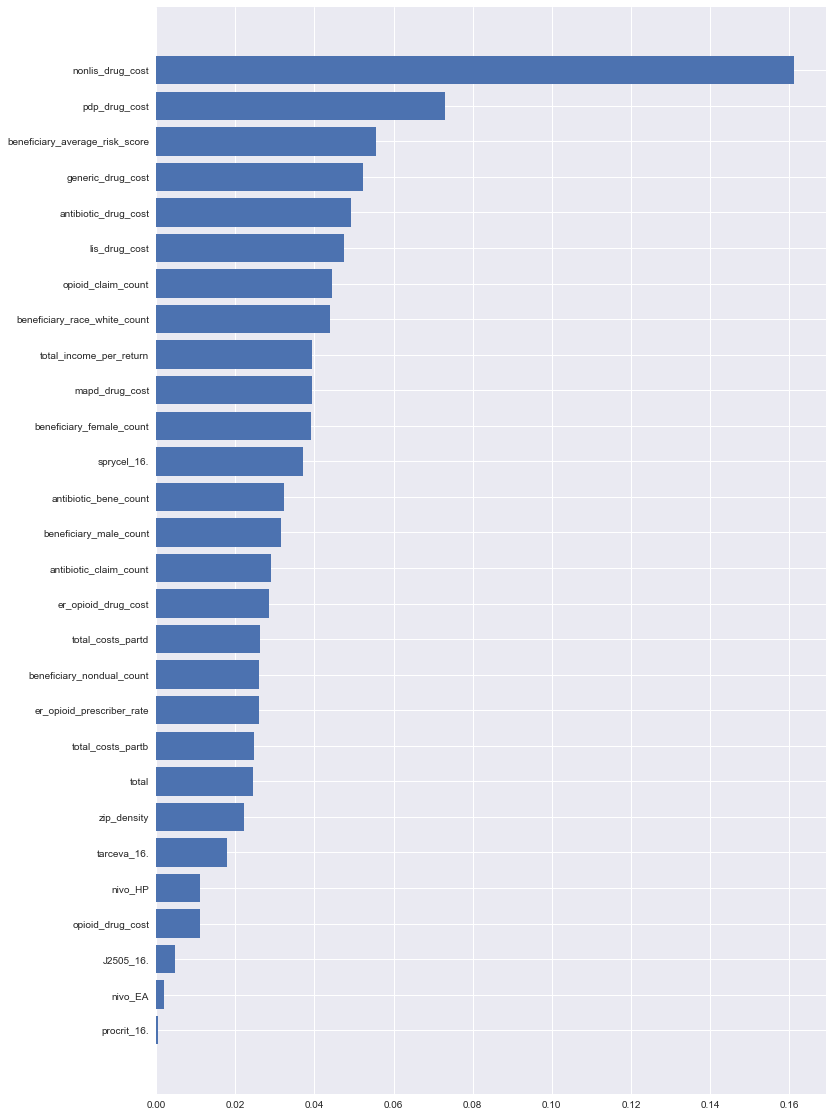

In [442]:
gbc.fit(X, y)
plot_feature_importances(gbc, X)

## pickle model

In [443]:
import pickle

In [447]:
# save pickle

clf = gbc.fit(X, y)
path = 'src/model_imbruvica.pkl'
model_pkl = open(path, 'wb')
pickle.dump(clf, model_pkl)
model_pkl.close()

In [451]:
model_unpickle = open(path, 'rb')
clf2 = pickle.load(model_unpickle, encoding='utf-8')

In [454]:
clf2.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

AttributeError: 'GradientBoostingClassifier' object has no attribute 'sum'